# 0.0. Imports

In [5]:
import pandas as pd
import numpy  as np
import pymc3  as pm
from matplotlib import pyplot as plt

## 0.1. Loading Data

In [6]:
ls -l brazilian-ecommerce

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 0C28-C25D



Arquivo nÆo encontrado


 Pasta de C:\Users\santo\repos\DataScience


 Pasta de C:\Users\santo\repos\DataScience\brazilian-ecommerce

22/06/2021  23:04    <DIR>          .
22/06/2021  23:04    <DIR>          ..
21/06/2021  06:11         9.033.957 olist_customers_dataset.csv
21/06/2021  06:11        61.273.883 olist_geolocation_dataset.csv
21/06/2021  06:11        15.438.671 olist_order_items_dataset.csv
21/06/2021  06:11         5.777.138 olist_order_payments_dataset.csv
21/06/2021  06:11        14.409.007 olist_order_reviews_dataset.csv
21/06/2021  06:11        17.654.914 olist_orders_dataset.csv
21/06/2021  06:11         2.379.446 olist_products_dataset.csv
21/06/2021  06:11           174.703 olist_sellers_dataset.csv
21/06/2021  06:11             2.613 product_category_name_translation.csv
               9 arquivo(s)    126.144.332 bytes
               2 pasta(s)   848.408.850.432 bytes dispon¡veis


In [8]:
df_raw = pd.read_csv( 'brazilian-ecommerce/olist_orders_dataset.csv')

In [9]:
df_raw.sample()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
90620,87df71eb46077c66a8e53d4e92bc71ef,c0254dbd03486d74cdefd62c0e0155d3,delivered,2018-04-24 19:05:19,2018-04-25 03:15:20,2018-04-25 14:20:00,2018-05-07 20:47:39,2018-05-18 00:00:00


# 1.0. Data Description

In [10]:
df1 = df_raw.copy()

## 1.1. Data Dimensions

In [11]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 99441
Number of Cols: 8


## 1.2. Data Type

In [12]:
df1['order_purchase_timestamp'] = pd.to_datetime(df1['order_purchase_timestamp'])
df1.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object

## 1.3. Data Missing

In [13]:
df1.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

# 2.0. Feature Engeneering

In [14]:
df1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:
df2 = df1.copy()

## 2.1. Feature Creation

In [16]:
df2['order_purchase_year_week'] = df2['order_purchase_timestamp'].dt.strftime('%Y%W')

In [17]:
df2.sample().T

,32198
order_id,8c59638b578341d034f1d7ffce0a5575
customer_id,9e8589c52f8d894c393473469d98624c
order_status,delivered
order_purchase_timestamp,2018-01-21 20:54:08
order_approved_at,2018-01-22 13:59:03
order_delivered_carrier_date,2018-01-23 19:18:58
order_delivered_customer_date,2018-01-29 15:13:42
order_estimated_delivery_date,2018-02-19 00:00:00
order_purchase_year_week,201803


# 3.0. Data Selection

In [18]:
df3 = df2.copy()

In [19]:
df3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_year_week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,201740
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,201830
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,201832
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,201746
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,201807


In [20]:
df3.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_purchase_year_week'],
      dtype='object')

In [21]:
df3['order_status'].drop_duplicates

<bound method Series.drop_duplicates of 0        delivered
1        delivered
2        delivered
3        delivered
4        delivered
           ...    
99436    delivered
99437    delivered
99438    delivered
99439    delivered
99440    delivered
Name: order_status, Length: 99441, dtype: object>

In [22]:
df3 = df3[df3['order_status'] == 'canceled'][['order_id', 'order_purchase_year_week']]

In [23]:
df3.head()

,order_id,order_purchase_year_week
397,1b9ecfe83cdc259250e1a8aca174f0ad,201831
613,714fb133a6730ab81fa1d3c1b2007291,201804
1058,3a129877493c8189c59c60eb71d97c29,201804
1130,00b1cb0320190ca0daa2c88b35206009,201835
1801,ed3efbd3a87bea76c2812c66a0b32219,201838


# 4.0. Data Preparation

In [27]:
df4 = df3.copy()

In [28]:
df4 = df4.groupby( 'order_purchase_year_week' ).count().reset_index()

In [29]:
df4 = df4.sort_values( 'order_puchase_year_week' )

KeyError: 'order_puchase_year_week'

In [30]:
df4.head(20)

,order_purchase_year_week,order_id
0,201636,1
1,201637,1
2,201639,1
3,201640,20
4,201641,2
5,201642,1
6,201702,2
7,201704,1
8,201705,4
9,201706,4


In [31]:
count_data = np.array(df4['order_id'])
n_count_data = len( count_data )

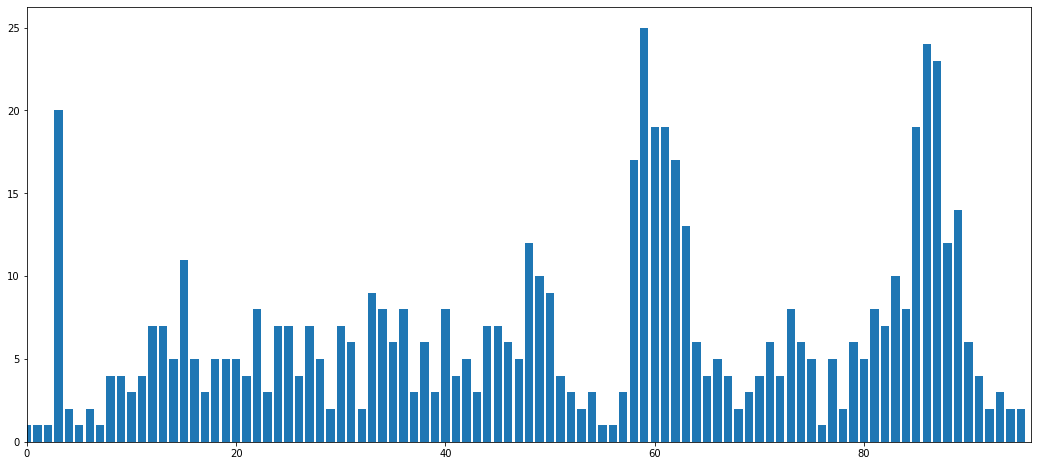

In [45]:
plt.figure(figsize=(18,8))
plt.bar(np.arange ( n_count_data), count_data)
plt.xlim( [0, n_count_data] );

# 5.0. Bayesian Inference 

In [46]:
with pm.Model() as model:
    # Prior 
    alpha = 1.0 / count_data.mean()
    lambda_01 = pm.Exponential ( 'lambda_01', alpha)
    lambda_02 = pm.Exponential ( 'lambda_02', alpha)

    tau = pm.DiscreteUniform( 'tau', lower=0, upper=n_count_data-1)

    # Posterior
    idx = np.arange( n_count_data )
    lambda_ = pm.math.switch( tau > idx, lambda_01, lambda_02 )
    obs = pm.Poisson ( 'obs', lambda_, observed=count_data )
    #Likelihood
    trace = pm.sample(draws=10000, tune=5000, step=pm.Metropolis())

<ipython-input-46-5928719e2bcb>:14: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(draws=10000, tune=5000, step=pm.Metropolis())
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_02]
>Metropolis: [lambda_01]


Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 496 seconds.
The number of effective samples is smaller than 25% for some parameters.


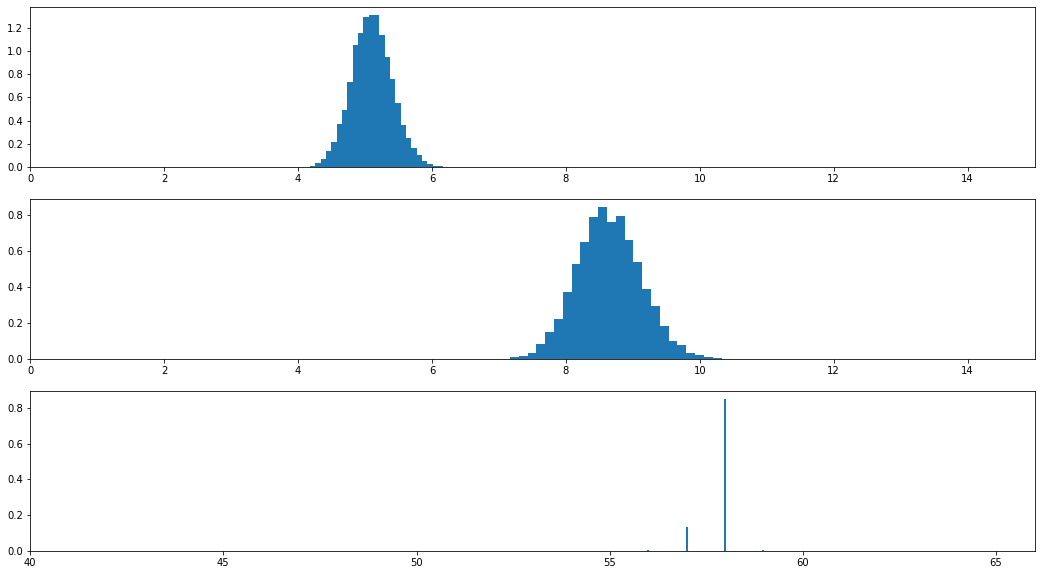

In [58]:
# posterior

plt.figure( figsize=(18, 10))

plt.subplot(311)
plt.hist( trace['lambda_01'], histtype='stepfilled', bins=30, density=True);
plt.xlim( [0, 15] );

plt.subplot(312)
plt.hist( trace['lambda_02'], histtype='stepfilled', bins=30, density=True);
plt.xlim( [0, 15] );

plt.subplot(313)
w = 1.0 /  trace['tau'].shape[0] * np.ones_like( trace['tau'] )
plt.hist( trace['tau'], bins=n_count_data, weights=w, rwidth=2.);
plt.xlim( [40, n_count_data-30] );

In [49]:
trace['lambda_01'].mean()

5.101632687705682

In [50]:
trace['lambda_02'].mean()

8.641996501892129

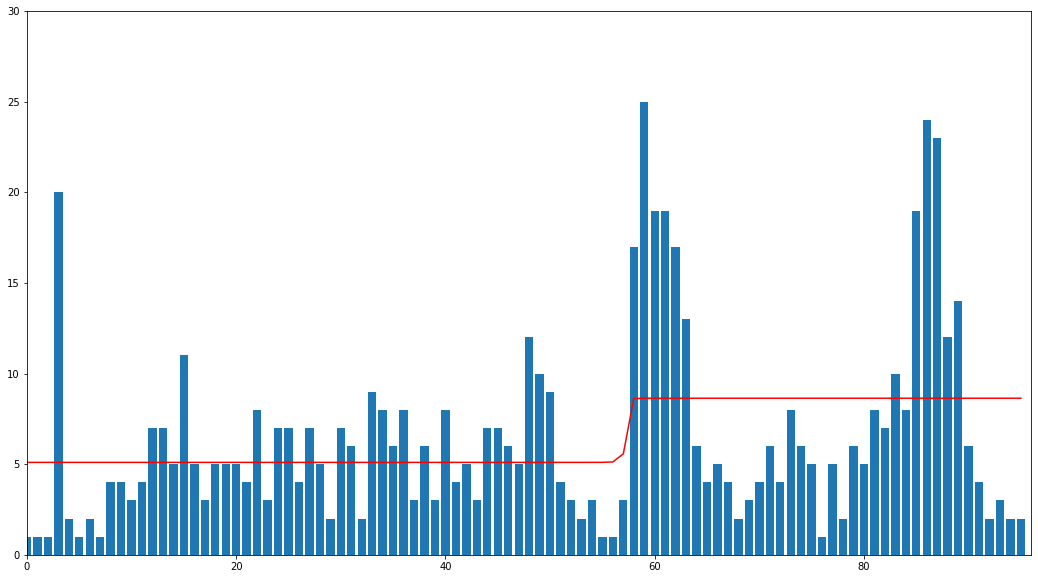

In [57]:
plt.figure(figsize=(18,10))
# Behaviour plot
canceled_by_day = np.zeros( n_count_data )
for day in range( 0, n_count_data ):
    ix = day < trace['tau']
    canceled_by_day[day] = ( trace['lambda_01'][ix].sum() + trace['lambda_02'][~ix].sum() ) / trace['tau'].shape[0]

# plots
plt.plot( range( n_count_data ), canceled_by_day, color='red')
plt.ylim([0, 30])

plt.bar(np.arange ( n_count_data), count_data)
plt.xlim( [0, n_count_data] );